In [2]:
import pandas as pd
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("DS_lv1/linear_regression_01.csv")
df.head(2)

,x,y
0,1,0
1,3,1


In [5]:
model = ols("y ~ x", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0848
Time:                        09:18:57   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.2

### Q. Sepal.Length를 종속변수로 Sepal.Width를 독립변수로 하여 단순 선형회귀 분석을 실시하시오.
- 단, 변수명때문에 에러가 나는 경우 임의로 변수명을 변경하고 실시하시오.

In [8]:
iris = pd.read_excel("DS_lv1/iris_xlsx.xlsx")
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [11]:
iris = iris.rename(columns = {"Sepal.Length" : "SL", "Sepal.Width" : "SW"})

In [15]:
model = ols("x ~ y", iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.152
Time:                        09:38:55   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5262      0.479     13.628      0.0

### Q2 1번의 회귀분석 결과에서 모델의 선형성 검정 결과 p-value를 확인하시오.

In [16]:
model.f_pvalue 

0.15189826071144713

### Q3. 1번의 회귀분석 결과에서 회귀식을 확인하고 이를 기술하시오. 

In [17]:
model.params # y = -0.223361x + 6.526223

Intercept    6.526223
y           -0.223361
dtype: float64

### Q4 Petal.Length를 종속변수로하고 Petal.Width 를 독립변수로 하여 그 결과를 확인하시오.

In [23]:
from statsmodels.formula.api import ols

In [24]:
iris = iris.rename(columns = {"Petal.Length" : "y", "Petal.Width" : "x"})

In [27]:
model = ols("y ~ x", iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.68e-86
Time:                        10:01:04   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3631      0.040     -9.131      0.0

In [28]:
model.predict(iris)

0      0.218982
1      0.218982
2      0.177407
3      0.260558
4      0.218982
         ...   
145    1.798853
146    1.715702
147    1.798853
148    1.882004
149    1.757277
Length: 150, dtype: float64

### Q1. iris 데이터를 학습 7, 평가 3으로 분리하고 학습데이터를 활용하여 Petal.Length를 종속변수, Petal.Width를 독립변수로 지정하고 단순선형회귀분석을 실시하시오. 
- random_state는 123으로 지정하시오
- 선형회귀분석은 statsmodels의 함수를 사용하시오

In [59]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
iris = pd.read_excel("DS_lv1/iris_xlsx.xlsx")
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [60]:
iris_train, iris_test = train_test_split(iris, train_size = 0.7, random_state = 123)
print(len(iris_train))
print(len(iris_test))

105
45


In [80]:
iris_test = iris.rename(columns = {"Petal.Length" : "PL", "Petal.Width" : "PW"})
iris.head(2)

,Sepal.Length,Sepal.Width,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [81]:
model = ols("PL ~ PW", data = iris_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PL   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.68e-86
Time:                        10:36:44   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.0

In [82]:
model.params

Intercept    1.083558
PW           2.229940
dtype: float64

### Q2. 1번의 모델에서 회귀계수를 반올림하여 소수점 첫째 자리 까지 출력하시오.

In [83]:
model.params[1].round(1)

2.2

### Q3. 평가데이터를 사용하여 예측값을 산출하시오.


In [84]:
pred = model.predict(iris_test)
pred[:4]

0    1.529546
1    1.529546
2    1.529546
3    1.529546
dtype: float64

### Q4. 3번의 결과를 사용하여 RMSE를 계산하시오. 

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(y_true = iris_test["PL"], y_pred = pred) ** 0.5

0.47500703971487884

### Q5. Petal.Width가 3.12 인 경우 Petal.Length는 값이 어떠한가?

In [87]:
model.predict(pd.DataFrame({"PW" : [3, 12]}))

0     7.773380
1    27.842844
dtype: float64

----------------------------------------------------------------------------

In [88]:
from sklearn.linear_model import LinearRegression

In [92]:
model_sk = LinearRegression().fit(X = iris[["PL"]],
                                  y = iris[["PW"]])

In [93]:
model_sk.coef_ # 회귀계수

array([[0.41575542]])

In [94]:
model_sk.intercept_ #절편`

array([-0.36307552])

In [95]:
model_sk.predict(iris.loc[:3, ["PL"]])

array([[0.21898206],
       [0.21898206],
       [0.17740652],
       [0.2605576 ]])

### ------------------------------------------------------------------------

In [97]:
bike = pd.read_csv("DS_lv1/bike.csv")

### Q1.  bike 객체를 train 8, test 2로 분리하여 각각 bike_train, bike_test 객체에 저장하고 각 객체의 row 개수를 출력하시오.
- seed 는 246으로 한다.(seed = random_state)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_wend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00


In [116]:
bike_train, bike_test = train_test_split(bike, train_size = 0.8, random_state = 246)
print(len(bike_train))
print(len(bike_test))

8708
2178


### Q2 registered를 종속변수로 하고 주말여부, weather, temp, windspeed변수를 독립변수로 하여 bike_train으로 학습한 다중선형회귀모델의 결정계수를 반올림하여 소수 둘째자리까지 출력하시오. 
- 주말여부 변수는 is_wend로 생성하고 datetime 변수를 활용하여 가공하시오. 
- statsmodels 라이브러리 함수를 사용하여 회귀분석을 실시하시오.

In [120]:
bike_train = bike_train.reset_index(drop = True)
bike_train["datetime"] = pd.to_datetime(bike_train["datetime"])
bike_train["is_wend"] = (bike_train["datetime"].dt.weekday >= 5) + 0


In [121]:
model = ols("registered ~ is_wend + weather + temp + windspeed",
            data = bike_train).fit()

In [122]:
round(model.rsquared, 2)

0.13

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     328.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          5.77e-264
Time:                        11:38:35   Log-Likelihood:                -55423.
No. Observations:                8708   AIC:                         1.109e+05
Df Residuals:                    8703   BIC:                         1.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4339      6.158      8.678      0.000      41.364      65.504
is_wend      -35.2054      3.337    -10.549      0.000     -41.747     -28.664
weather      -23.0506      2.383     -9.674      0.000     -27.721     -18.380
temp           6.0615      0.194     31.287      0.000       5.682       6.441
windspeed      1.7532      0.185      9.481      0.000       1.391       2.116
==============================================================================
Omnibus:                     2238.527   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5404.979
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                       5.599   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["hour"] = bike["datetime"].dt.hour
bike_agg = bike.groupby("hour")["registered"].mean()

<AxesSubplot:xlabel='hour'>

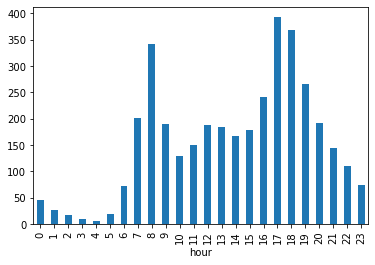

In [131]:
bike_agg.plot(kind = "bar")

### Q. casual 변수의 시간대별 평균값을 막대그래프로 그려보시오.

In [132]:
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_wend,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1


In [135]:
bike_1 = bike.groupby("hour")["casual"].mean()

<AxesSubplot:xlabel='hour'>

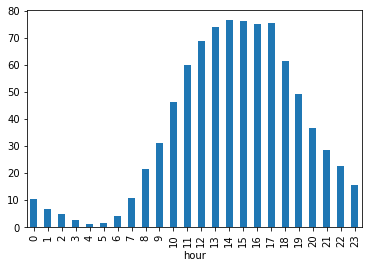

In [136]:
bike_1.plot(kind = "bar")

### Q2. registered 변수의 요일별 평균값을 막대그래프로 그려보시오.

In [143]:
bike["wday"] = bike["datetime"].dt.weekday
bike_2 = bike.groupby("wday")["registered"].mean()

<AxesSubplot:xlabel='wday'>

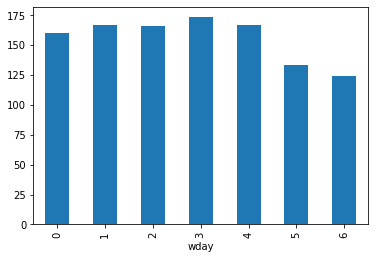

In [144]:
bike_2.plot(kind = "bar")

### Q3. casual 변수의 요일별 평균값을 막대그래프로 그려보시오.


<AxesSubplot:xlabel='wday'>

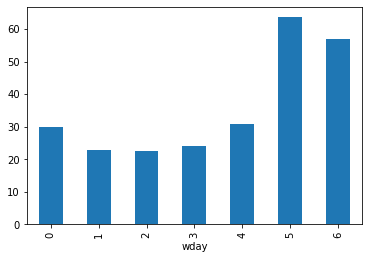

In [146]:
bike.groupby("wday")["casual"].mean().plot(kind = "bar")

---------------------------------------------------

In [147]:
dia = pd.read_csv("DS_lv1/diamonds.csv")
dia.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [148]:
dia_cum = pd.get_dummies(data = dia, columns = ["cut"])
dia_cum.head(2)

,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0


In [151]:
dia_cum.columns

Index(['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [149]:
dia_cum2 = pd.get_dummies(data = dia, columns=["cut"],
                          drop_first=True)
dia_cum2.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0


In [152]:
"price ~ " + " + ".join(dia.columns[:4])

'price ~ carat + cut + color + clarity'

### Q. dia 객체를 학습 8, 평가 2로 분리하고 학습데이터 세트를 기준으로 다중선형회귀 분석을 실시하시오. 그리고 회귀모델의 결정계수를 반올림하여 소수점 둘째 자리까지 기술하시오.
- 종속변수는 price, 독립변수는 clolr, carat으로 지정하시오.
- 명목형 변수는 One Hot Encoding을 실시하고 첫번째 더미변수는 제거하시오.
- 데이터 세트 분리 시 seed는 234로 지정하시오. 

In [180]:
dia_dum = pd.get_dummies(dia[["price", "carat", "color"]],
                         columns = ["color"], drop_first = True)
dia_dum.head(2)

,price,carat,color_E,color_F,color_G,color_H,color_I,color_J
0,326,0.23,1,0,0,0,0,0
1,326,0.21,1,0,0,0,0,0


In [181]:
dia_train, dia_test = train_test_split(dia_dum,
                                       train_size = 0.8,
                                       random_state = 234)

In [182]:
model = ols("price ~" + " + ".join(dia_train.columns[1:]), data = dia_train).fit()

In [183]:
round(model.rsquared, 2)

0.86

### Q2. 1번에서 생성한 모델을 기준으로 평가 데이터 세트를 활용하여 예측값을 생산하고 MAE를 구하시오.
- 단, 결과값은 반올림하여 소수점 셋째자리까지 출력하시오.

In [187]:
from sklearn.metrics import mean_absolute_error

In [188]:
pred = model.predict(dia_test)
round(mean_absolute_error(y_true = dia_test["price"], y_pred = pred), 3)

979.735

### Q3. 색상이 J이면서 1캐럿인 다이아몬드의 가격은 얼마인가?
- 1번에서 생성한 모델을 기준으로 연산하시오.

In [190]:
dia_train.tail(2)

,price,carat,color_E,color_F,color_G,color_H,color_I,color_J
41284,1209,0.53,0,0,0,0,1,0
31176,756,0.32,0,0,0,0,0,0


In [194]:
test_1row = dia_train.iloc[[0], 1:].reset_index(drop = True)
test_1row["color_E"] = 0
test_1row["color_J"] = 1
test_1row["carat"] = 1
test_1row

,carat,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0,0,0,0,0,1


In [195]:
model.predict(test_1row)

0    4006.026615
dtype: float64

### -------------------------------------------------------------------

#### 로지스틱 회귀

In [203]:
from statsmodels.api import Logit

In [204]:
df = pd.read_csv("DS_lv1/logistic_regression_01.csv")
df.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [205]:
model = Logit(endog = df[["admit"]], exog = df.drop("admit", axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [207]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                 0.06176
Time:                        15:44:51   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
==============================================================================
"""

In [208]:
import numpy as np

In [209]:
model.params

gre     0.001477
gpa    -0.004167
rank   -0.669538
dtype: float64

In [211]:
np.exp(model.params) #Odds Ratio

gre     1.001478
gpa     0.995842
rank    0.511945
dtype: float64

### Q. 다음 classification_data_01.csv 파일의 데이터를 사용하여 분석을 실시하시오.

In [221]:
df = pd.read_csv("DS_lv1/classification_data_01.csv")
df.head(2)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


### Q1. 학습과 평가를 7:3으로 분리하고 이항 로지스틱 회귀 분석을 실시하고 각 독립변수의 OR(Odds Ratio)를 계산하시오.
- statsmodels 라이브러리의 함수를 사용하시오.  
- seed는 567로 지정하시오  
- 결과값은 반올림하여 소수점 둘째 자리까지 표기하시오.  

In [224]:
from statsmodels.formula.api import ols
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 567)

In [226]:
from statsmodels.api import Logit
model = Logit(endog = df_train[["Class"]],
              exog = df_train.drop("Class", axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.102186
         Iterations 11


In [227]:
np.exp(model.params)

Variance    0.069384
Skewness    0.191537
Curtosis    0.169990
Entropy     0.429068
dtype: float64

### Q2. 평가 데이터세트로 1번에서 생서한 모델을 활용하여 예측값을 생산하시오.  이 때 예측값 중 최대값과 최소값을 확인하시오.

In [228]:
pred = model.predict(df_test.drop("Class", axis = 1))

In [229]:
pred[:3]

340     4.406641e-10
21      3.143262e-01
1011    8.638152e-01
dtype: float64

In [230]:
print(min(pred))
print(max(pred))

8.466990097583378e-11
0.9999912797481564


In [231]:
pred_class = (pred > 0.5) + 0
pred_class[:4]

340     0
21      0
1011    1
1330    1
dtype: int32

In [232]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [233]:
accuracy_score(y_true = df_test["Class"], y_pred = pred_class)

0.9660194174757282

In [235]:
pd.crosstab(df_test["Class"], pred_class)

col_0,0,1
Class,,
0,235,0
1,14,163


In [236]:
from sklearn.metrics import roc_auc_score

In [239]:
roc_auc_score(y_true = df_test["Class"], y_score = pred) # 분류값이 아닌 확률값

0.9990143046039187

----------------------------------------

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [241]:
model_c = DecisionTreeClassifier(random_state = 123).fit(X = df.loc[:, :"Entropy"],
                                                         y = df[["Class"]])

In [242]:
pred_class = model_c.predict(df.loc[:, :"Entropy"])
pred_class

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [246]:
accuracy_score(y_true = df["Class"], y_pred = pred_class)

1.0

In [247]:
df_train, df_test = train_test_split(df, train_size = 0.6, random_state = 999)

In [249]:
model_c = DecisionTreeClassifier(random_state = 999)
model_c = model_c.fit(X = df.loc[:, :"Entropy"],
                     y = df[["Class"]])

In [251]:
model_c.predict_proba(df_test.loc[:, :"Entropy"]) # probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [252]:
model_c.predict(df_test.loc[:, :"Entropy"])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,